In [36]:
import numpy as np
%pylab inline
plt.style.use('plotting')
import matplotlib.ticker
from math import floor, ceil

Populating the interactive namespace from numpy and matplotlib


# split galaxies along x=0 (0/180 deg)

In [37]:
def plot_split_stats(split_string):
    plt.figure(figsize=(10,5))
    ax = subplot(121)
    ax2 = subplot(122)
    ids0 = np.loadtxt('M31analogs_noMM8Gyr_mstar.txt') #61                                                                                                   
    #print(len(ids0))   

    noMM_max = []
    MM_max = []

    noMM_avg = []
    MM_avg = []

    # no MM sample
    for id in ids0:
        id = int(id)
        #load SFR data for each half based on specific split 
        data = np.loadtxt('%s_SFR_time_avg_norecentMM_%ssplit.txt'%(id, split_string))
        
        # [4:] will only keep the SFRs for 1-4 Gyr rather than 0-4 Gyr; figure out whether left/right or right/left is greater
        ratio1 = data[:,1][4:]/data[:,2][4:]
        ratio2 = data[:,2][4:]/data[:,1][4:]
        ratio = [np.max([i,j]) for i,j in zip(ratio1,ratio2)]
        
        #remove analogs with SFRs that go to infinity 
        if inf in ratio:
            continue
        #take the maximum of the ratio of mean SFRs
        mean_ratios = [np.mean(data[:,1][4:])/np.mean(data[:,2][4:]), np.mean(data[:,2][4:])/np.mean(data[:,1][4:])]
        noMM_avg.append(np.max(mean_ratios))
        
        times = list(data[:,0][4:])
        ax.plot(times,ratio,color='C1',alpha=0.2)

    # repeat for MM sample 
    ids = np.loadtxt('M31analogs_MM1_4Gyr_mstar.txt')
    #print(len(ids))

    for id in ids:
        id = int(id)
        data = np.loadtxt('%s_SFR_time_avg_recentMM_%ssplit.txt'%(id, split_string))
        ratio1 = data[:,1][4:]/data[:,2][4:]
        ratio2 = data[:,2][4:]/data[:,1][4:]
        ratio = [np.max([i,j]) for i,j in zip(ratio1,ratio2)]
        ratio = np.nan_to_num(ratio)
        mean_ratios = [np.mean(data[:,1][4:])/np.mean(data[:,2][4:]), np.mean(data[:,2][4:])/np.mean(data[:,1][4:])]
        MM_avg.append(np.max(mean_ratios))
        times = list(data[:,0][4:])
        ax.plot(times,ratio,color='C0', lw=2)
        #if id == 413061:
        #    ax.plot(times,ratio,color='C2', lw=2)

    ax.set_yscale("log")
    ax.invert_xaxis()
    ax.set_xlabel('Age [Gyr]')
    ax.set_ylabel('SFR ratio')
    ax.set_ylim(1, 1e4)

    noMM_avg = np.nan_to_num(noMM_avg)
    MM_avg = np.nan_to_num(MM_avg)
    bin_range = np.max([np.max(noMM_avg), np.max(MM_avg)])
    print(bin_range,ceil(bin_range))
    bin_range = int(ceil(bin_range))
    ax2.hist(noMM_avg, bins=bin_range,range=(0,bin_range), color='C1',alpha=0.4,density=True, stacked=True, label='no recent MM (%s)'%len(noMM_avg))
    ax2.hist(MM_avg, bins=bin_range, range=(0,bin_range),color='C0',alpha=0.4, density=True,stacked=True,label='recent MM (%s)'%len(MM_avg))
    ax2.set_xlabel('ratio of SFR mean')
    ax2.set_ylabel('probability density')
    ax2.legend()

    print('no MMs:',len(noMM_avg))#, np.sort(noMM_avg))
    print('MMs:',len(MM_avg))
    #print(np.sort(noMM_avg))
    #print(MM_avg, MM_max, ids)
    plt.tight_layout()
    return

(9.479320229493062, 10.0)
('no MMs:', 39)
('MMs:', 6)


/Users/ektapatel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in divide
/Users/ektapatel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide


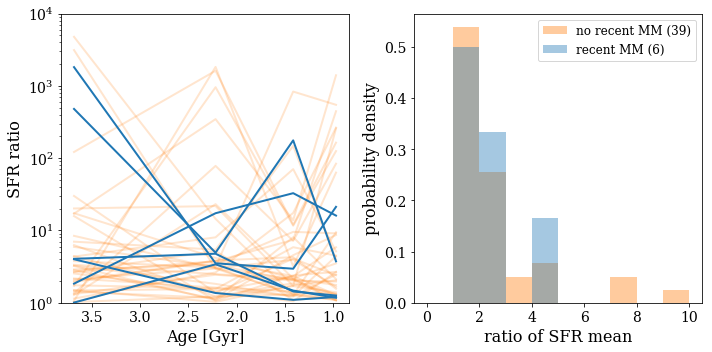

In [38]:
plot_split_stats('x0')

# split galaxies at y=0 (90 degrees)

/Users/ektapatel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in divide
/Users/ektapatel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide


(37.89604403612116, 38.0)
('no MMs:', 43)
('MMs:', 6)


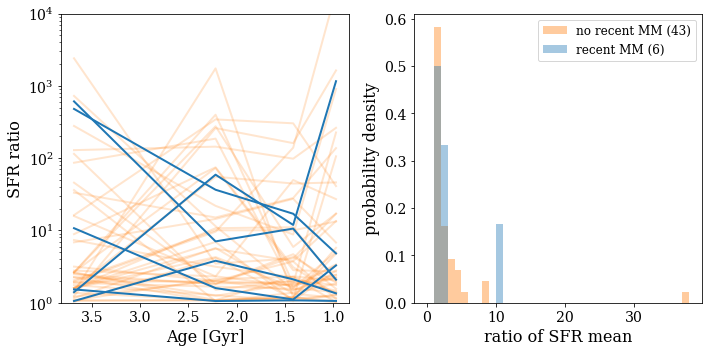

In [39]:
plot_split_stats('y0')

# split galaxies along m=1 (45 degrees)

/Users/ektapatel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in divide
/Users/ektapatel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide


(35.627681920958814, 36.0)
('no MMs:', 41)
('MMs:', 6)


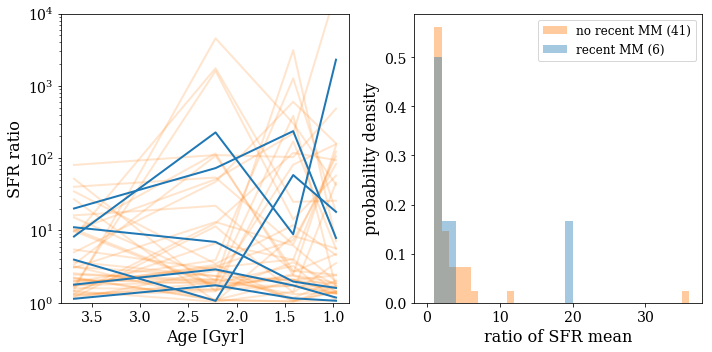

In [40]:
plot_split_stats('m1')

# split galaxies along m=-1 (135 deg)

/Users/ektapatel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in divide
/Users/ektapatel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in divide


(19.042475885275646, 20.0)
('no MMs:', 44)
('MMs:', 6)


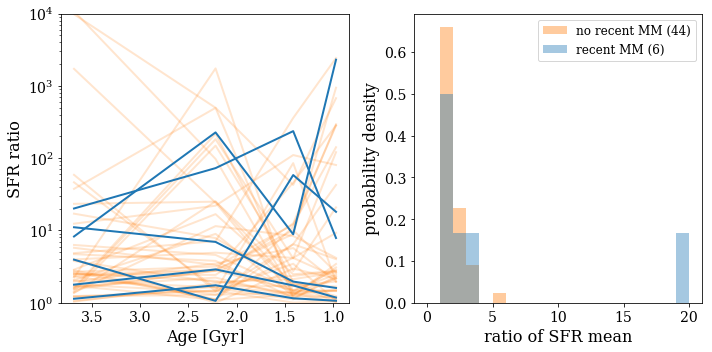

In [41]:
plot_split_stats('m-1')

# try plotting the histogram of maximum ratios for all angles tried

In [42]:
def find_max_angle():
    ids0 = np.loadtxt('M31analogs_noMM8Gyr_mstar.txt') #61  
    ids = np.loadtxt('M31analogs_MM1_4Gyr_mstar.txt') #6
    noMM_max = []
    MM_max = []

    split_strings = ['y0', 'x0', 'm1', 'm-1']    
    
    for id in ids0:
        id = int(id)
        temp_ratios = []
        
        for split_string in split_strings: 
            #print(split_string)
            #for a given split, save the max SFR ratio of the mean SFR based on left/right vs. right/left
            data = np.loadtxt('%s_SFR_time_avg_norecentMM_%ssplit.txt'%(id, split_string))
            ratio1 = data[:,1][4:]/data[:,2][4:]
            ratio2 = data[:,2][4:]/data[:,1][4:]
            ratio = [np.max([i,j]) for i,j in zip(ratio1,ratio2)]
            if inf in ratio:
                continue
            #ratio = np.nan_to_num(ratio)
            mean_ratios = [np.mean(data[:,1][4:])/np.mean(data[:,2][4:]), np.mean(data[:,2][4:])/np.mean(data[:,1][4:])]
            this_ratio = np.max(mean_ratios)
            temp_ratios.append(this_ratio)
        if len(temp_ratios) >=1:
            noMM_max.append(np.max(temp_ratios))
        #print(temp_ratios, noMM_max)
        
    for id in ids:
        id = int(id)
        temp_ratios = []
        
        for split_string in split_strings: 
            #print(split_string)
            #for a given split, save the max SFR ratio of the mean SFR based on left/right vs. right/left
            data = np.loadtxt('%s_SFR_time_avg_recentMM_%ssplit.txt'%(id, split_string))
            ratio1 = data[:,1][4:]/data[:,2][4:]
            ratio2 = data[:,2][4:]/data[:,1][4:]
            ratio = [np.max([i,j]) for i,j in zip(ratio1,ratio2)]
            if inf in ratio:
                continue
            #ratio = np.nan_to_num(ratio)
            mean_ratios = [np.mean(data[:,1][4:])/np.mean(data[:,2][4:]), np.mean(data[:,2][4:])/np.mean(data[:,1][4:])]
            this_ratio = np.max(mean_ratios)
            temp_ratios.append(this_ratio)
        if len(temp_ratios) >=1:
            MM_max.append(np.max(temp_ratios))
        #print(temp_ratios, noMM_max)
        
              
    return noMM_max, MM_max


(19.042475885275646, 37.89604403612116)


/Users/ektapatel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in divide
/Users/ektapatel/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in divide


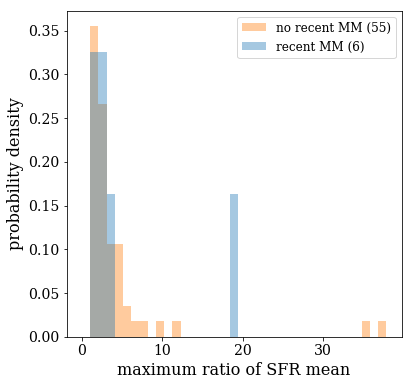

In [43]:
noMMs, MMs = find_max_angle()

plt.figure(figsize=(6,6))
bin_range = np.max([np.max(MMs), np.max(noMMs)])
print(np.max(MMs), np.max(noMMs))
plt.hist(noMMs, bins=int(bin_range),range=(0,bin_range), color='C1',alpha=0.4,density=True, stacked=True, label='no recent MM (%s)'%len(noMMs))
plt.hist(MMs, bins=int(bin_range), range=(0,bin_range),color='C0',alpha=0.4, density=True,stacked=True,label='recent MM (%s)'%len(MMs))
plt.xlabel('maximum ratio of SFR mean')
plt.ylabel('probability density')
plt.legend()

